In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images1/nnn.png
/kaggle/input/netflix-shows/netflix_titles.csv
/kaggle/input/images/netflix.avif


![netflix logo](https://www.syfy.com/sites/syfy/files/styles/hero-image--large--computer--alt-1_5x/public/2021/11/493f5bba-81a4-11e9-bf79-066b49664af6_cm_1440w.png?h=7985451d)

# **ABOUT NETFLIX:** 
**Netflix is a leading online streaming platform that was founded in 1997. Originally starting as a DVD rental service, Netflix quickly evolved and became one of the pioneers of the streaming industry. In 2007, they introduced their streaming service, allowing subscribers to access a wide range of movies, TV shows, documentaries, and original content directly on their devices.**

**The introduction of Netflix's streaming service marked a significant shift in the way people consume entertainment. It provided viewers with the convenience of instantly streaming content without the need for physical media or waiting for DVDs to be delivered. This convenience, combined with a vast library of content, attracted a large and dedicated user base.**

**Today, Netflix is used by millions of subscribers worldwide. It has revolutionized the entertainment industry, setting trends and shaping viewing habits. The platform offers a diverse selection of content across various genres and languages, catering to a wide range of tastes and preferences. With its user-friendly interface, personalized recommendations, and the ability to create multiple user profiles, Netflix provides a seamless and enjoyable streaming experience for its users.**

**Netflix's success can be attributed to its commitment to producing high-quality original content, including award-winning TV series, documentaries, and films. Their investment in original programming has helped them build a loyal fan base and set them apart from traditional broadcast and cable networks.**

**In conclusion, Netflix has emerged as a dominant force in the entertainment industry, offering a convenient and extensive streaming service that has changed the way we consume media. With its vast library of content, user-friendly interface, and commitment to producing original and engaging programming, Netflix continues to be a preferred choice for viewers seeking quality entertainment at their fingertips.**

# Data Preprocessing

In [45]:
#Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import random
from datetime import datetime
import os 
import plotly.express as px
import math
from colorama import Fore, Style
from wordcloud import WordCloud

In [46]:
#Loading file 
data = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [47]:
#First 5 rows of the dataset
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [48]:
# Generate summary statistics of numerical columns in the DataFrame
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [49]:
#Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [50]:
#Columns in dataset
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [51]:
#Number of rows and columns in dataset
print("The number of rows and columns in this dataset are : ",data.shape)

The number of rows and columns in this dataset are :  (8807, 12)


In [52]:
#Checking for null values in dataset
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

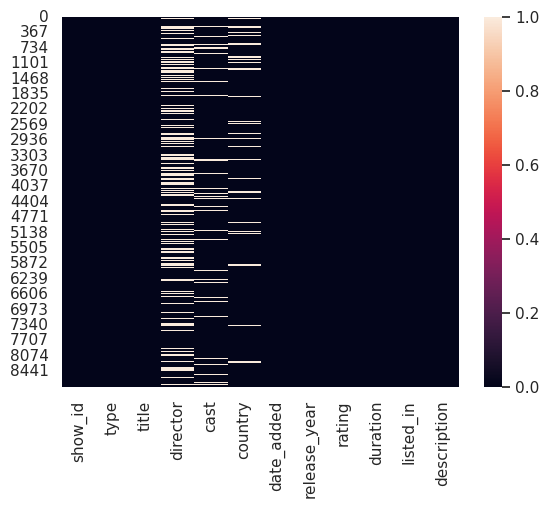

In [53]:
#Shows null spaces
sns.heatmap(data.isnull())

# Analysis of Content Type Distribution: Movies vs TV Shows

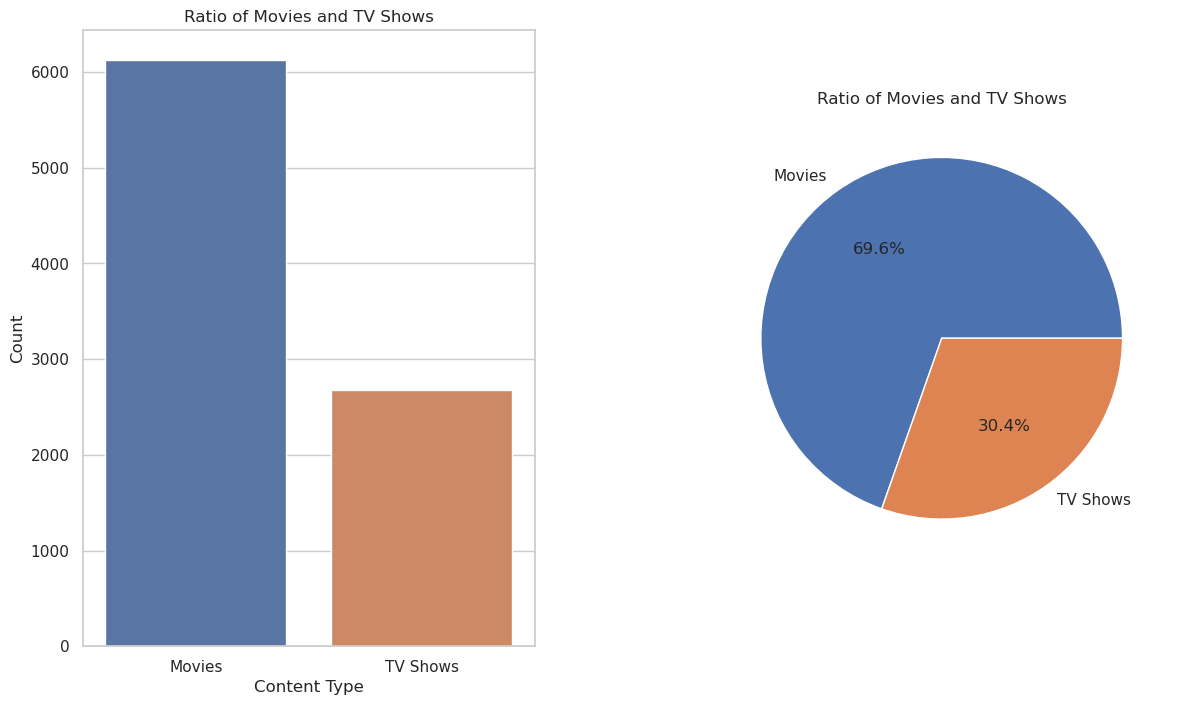

In [54]:
# Calculate the count of movies and TV shows
movies_count = data[data['type'] == 'Movie'].shape[0]
tv_shows_count = data[data['type'] == 'TV Show'].shape[0]

# Create a new DataFrame with the counts
counts_data = pd.DataFrame({'Content Type': ['Movies', 'TV Shows'],
                           'Count': [movies_count, tv_shows_count]})

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Plot the bar chart
sns.barplot(x='Content Type', y='Count', data=counts_data, ax=ax1)
ax1.set_xlabel('Content Type')
ax1.set_ylabel('Count')
ax1.set_title('Ratio of Movies and TV Shows')

# Plot the pie chart
counts = [movies_count, tv_shows_count]
labels = ['Movies', 'TV Shows']
ax2.pie(counts, labels=labels, autopct='%1.1f%%')
ax2.set_title('Ratio of Movies and TV Shows')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()

# OBSERVATION
**The ratio of movies to TV shows is approximately 69.6% to 30.4%.**

# Analysis of Number of Movies and TV Shows Released by Year

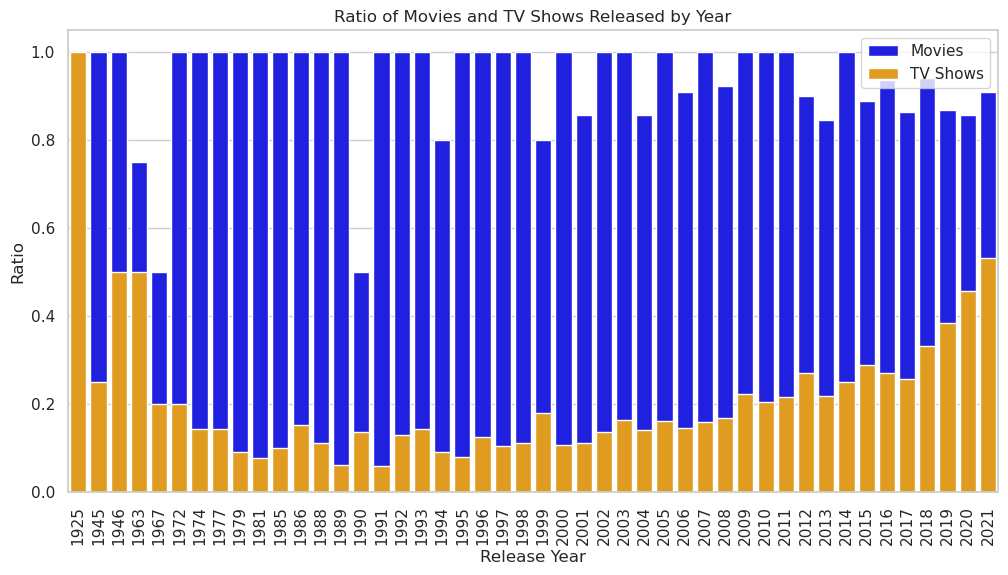

In [55]:
# Group the data by release_year and content type, and count the occurrences
grouped_data = data.groupby(['release_year', 'type']).size().reset_index(name='count')

# Filter for movies and TV shows separately
movies_data = grouped_data[grouped_data['type'] == 'Movie']
tv_shows_data = grouped_data[grouped_data['type'] == 'TV Show']

# Calculate the total count for each release year
total_counts = grouped_data.groupby('release_year')['count'].sum().reset_index(name='total_count')

# Calculate the ratio of movies and TV shows to the total count for each release year
movies_ratio = movies_data.merge(total_counts, on='release_year')
movies_ratio['ratio'] = movies_ratio['count'] / movies_ratio['total_count']

tv_shows_ratio = tv_shows_data.merge(total_counts, on='release_year')
tv_shows_ratio['ratio'] = tv_shows_ratio['count'] / tv_shows_ratio['total_count']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart for movies ratio
sns.barplot(x='release_year', y='ratio', data=movies_ratio, color='blue', ax=ax, label='Movies')

# Plot the bar chart for TV shows ratio
sns.barplot(x='release_year', y='ratio', data=tv_shows_ratio, color='orange', ax=ax, label='TV Shows')

# Add labels and title
ax.set_xlabel('Release Year')
ax.set_ylabel('Ratio')
ax.set_title('Ratio of Movies and TV Shows Released by Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Display the plot
plt.show()

# OBSERVATION 
**Movies have consistently surpassed TV shows in terms of the number of releases over the years.**

# Analysis of Distribution of Ratings

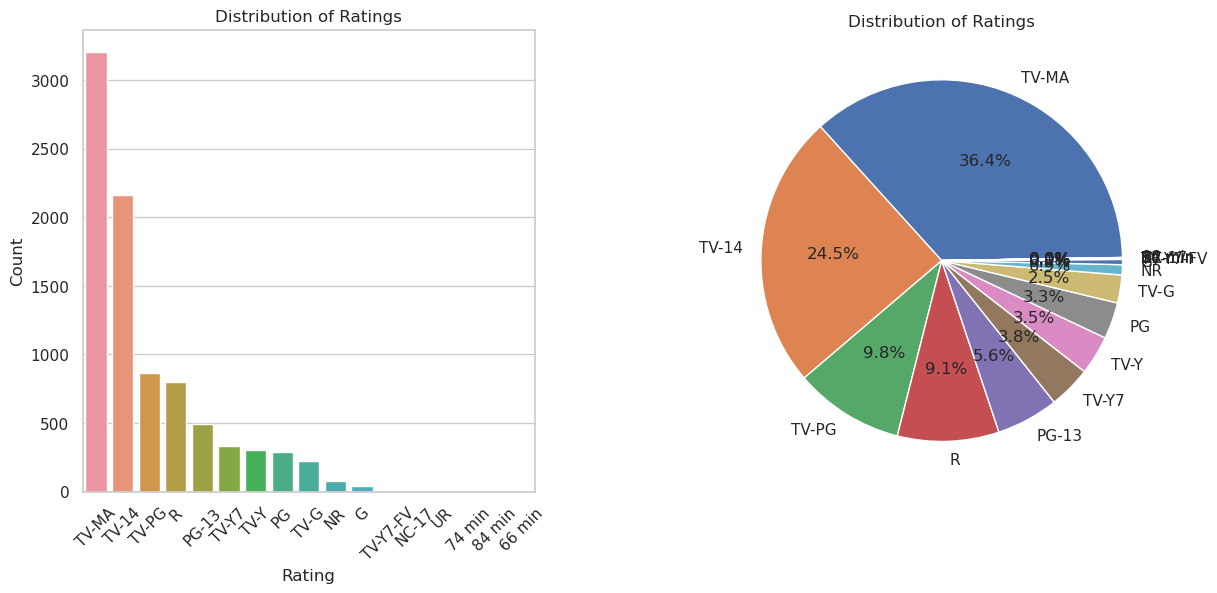

In [56]:
# Count the occurrences of each rating
rating_counts = data['rating'].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Updated figsize

# Plot the count bar chart
sns.barplot(x=rating_counts.index, y=rating_counts.values, ax=ax1)
ax1.set_xlabel('Rating')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Ratings')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  # Rotate x-axis labels

# Plot the pie chart
ax2.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%',startangle=1)
ax2.set_title('Distribution of Ratings')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()

# Analysis of Rating Distribution by Content Type

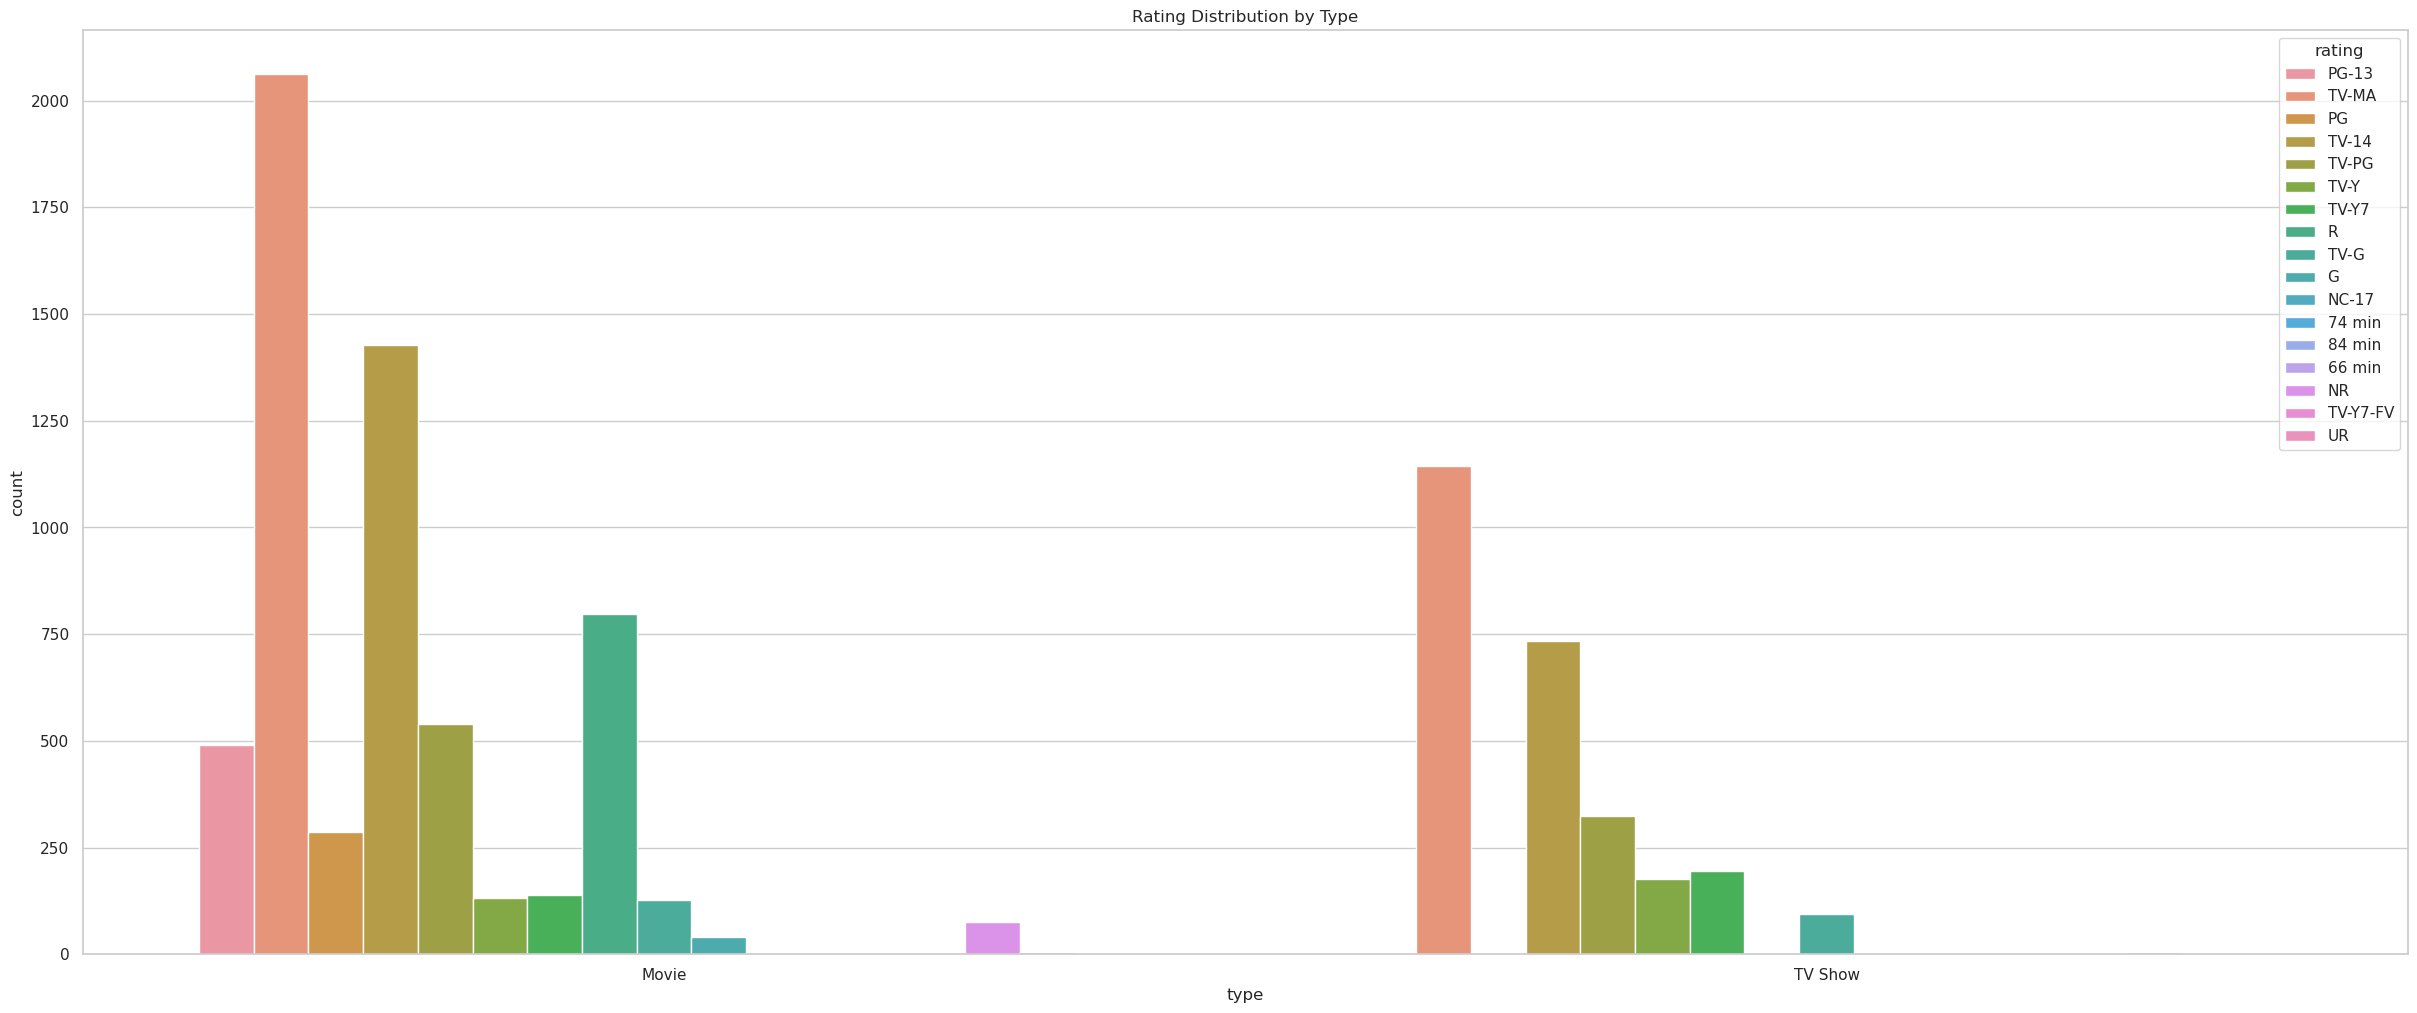

In [57]:
# Set the figure size
plt.figure(figsize=(30, 12))

# Plot the countplot with 'type' on x-axis and 'rating' on hue
sns.countplot(x='type', hue='rating', data=data)

# Set the title
plt.title('Rating Distribution by Type')

# Display the plot
plt.show()

# OBSERVATION
**TV-MA has the highest rating distribution in both movies and TV shows.**

# Analysis of Highest and Lowest Rated Movie

In [58]:
# Filter the data for movies
movies_data = data[data['type'] == 'Movie']

# Drop rows with missing values in the 'rating' column
movies_data = movies_data.dropna(subset=['rating'])

# Sort movies_data by rating in descending order
sorted_movies = movies_data.sort_values('rating', ascending=False)

# Get the movie with the highest rating
highest_rated_movie = sorted_movies.iloc[0]

# Get the movie with the lowest rating
lowest_rated_movie = sorted_movies.iloc[-1]

# Print the details of the highest rated movie
print(Fore.BLUE + "Movie with the highest rating:")
print(Fore.RED + "Title:", highest_rated_movie['title'])
print(Fore.RED + "Rating:", highest_rated_movie['rating'])
print(Style.RESET_ALL)

# Print the details of the lowest rated movie
print(Fore.BLUE + "Movie with the lowest rating:")
print(Fore.RED + "Title:", lowest_rated_movie['title'])
print(Fore.RED + "Rating:", lowest_rated_movie['rating'])
print(Style.RESET_ALL)

Movie with the highest rating:
Title: You Don't Mess with the Zohan
Rating: UR

Movie with the lowest rating:
Title: Louis C.K.: Live at the Comedy Store
Rating: 66 min



# Analysis of Highest and Lowest Rated TV Show

In [59]:
# Filter the data for TV shows
tv_shows_data = data[data['type'] == 'TV Show']

# Drop rows with missing values in the 'rating' column
tv_shows_data = tv_shows_data.dropna(subset=['rating'])

# Sort tv_shows_data by rating in descending order
sorted_tv_shows = tv_shows_data.sort_values('rating', ascending=False)

# Get the TV show with the highest rating
highest_rated_tv_show = sorted_tv_shows.iloc[0]

# Get the TV show with the lowest rating
lowest_rated_tv_show = sorted_tv_shows.iloc[-1]

# Print the details of the highest rated TV show
print(Fore.BLUE + "TV show with the highest rating:")
print(Fore.RED + "Title:", highest_rated_tv_show['title'])
print(Fore.RED + "Rating:", highest_rated_tv_show['rating'])
print(Style.RESET_ALL)

# Print the details of the lowest rated TV show
print(Fore.BLUE + "TV show with the lowest rating:")
print(Fore.RED + "Title:", lowest_rated_tv_show['title'])
print(Fore.RED + "Rating:", lowest_rated_tv_show['rating'])
print(Style.RESET_ALL)

TV show with the highest rating:
Title: Oh No! It's an Alien Invasion
Rating: TV-Y7-FV

TV show with the lowest rating:
Title: Russell Peters vs. the World
Rating: NR



# Analysis of Movies by Country

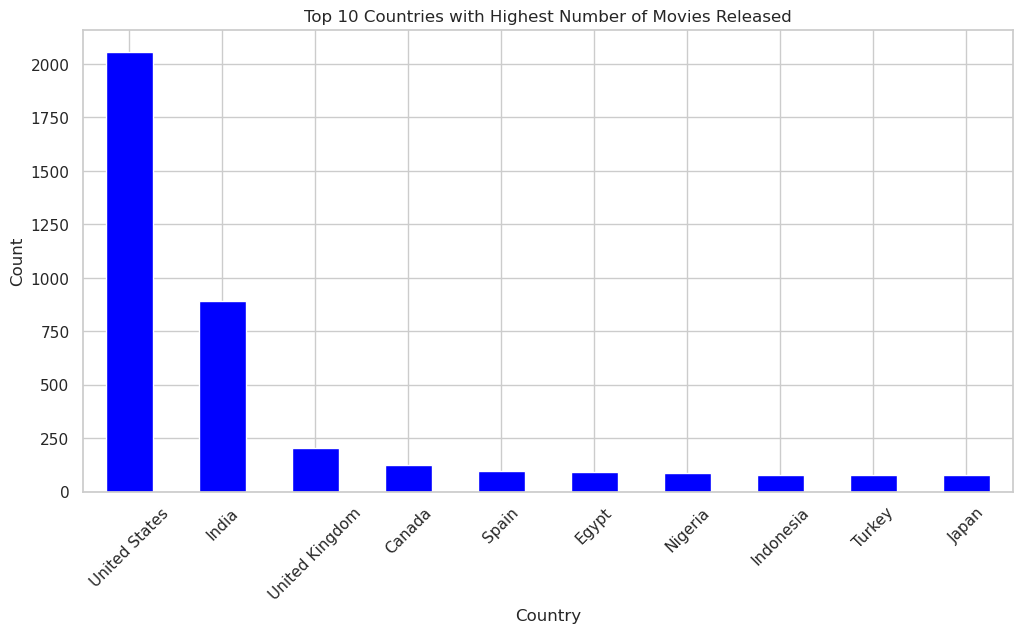

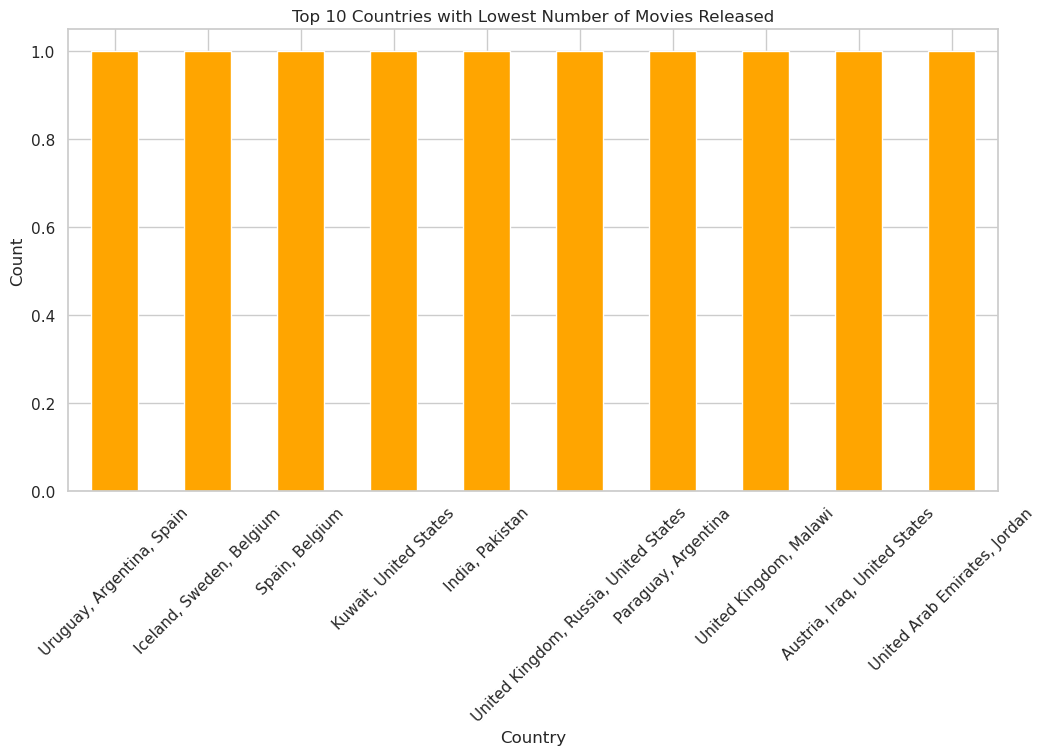

In [60]:
# Filter the data for movies
movies_data = data[data['type'] == 'Movie']

# Group the data by country and count the number of movies in each country
movies_by_country = movies_data['country'].value_counts()

# Get the top 10 countries with the highest number of movies released
top_10_countries_highest = movies_by_country.head(10)

# Get the top 10 countries with the lowest number of movies released
top_10_countries_lowest = movies_by_country.tail(10)

# Create a figure and axis for the bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for the top 10 countries with the highest number of movies released
top_10_countries_highest.plot(kind='bar', color='blue', ax=ax)
ax.set_title('Top 10 Countries with Highest Number of Movies Released')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot for the top 10 countries with the highest number of movies released
plt.show()

# Create a figure and axis for the bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for the top 10 countries with the lowest number of movies released
top_10_countries_lowest.plot(kind='bar', color='orange', ax=ax)
ax.set_title('Top 10 Countries with Lowest Number of Movies Released')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot for the top 10 countries with the lowest number of movies released
plt.show()

# OBSERVATION
**The United States has released the highest number of movies among the top 10 countries.**

# Analysis of TV Shows by Country

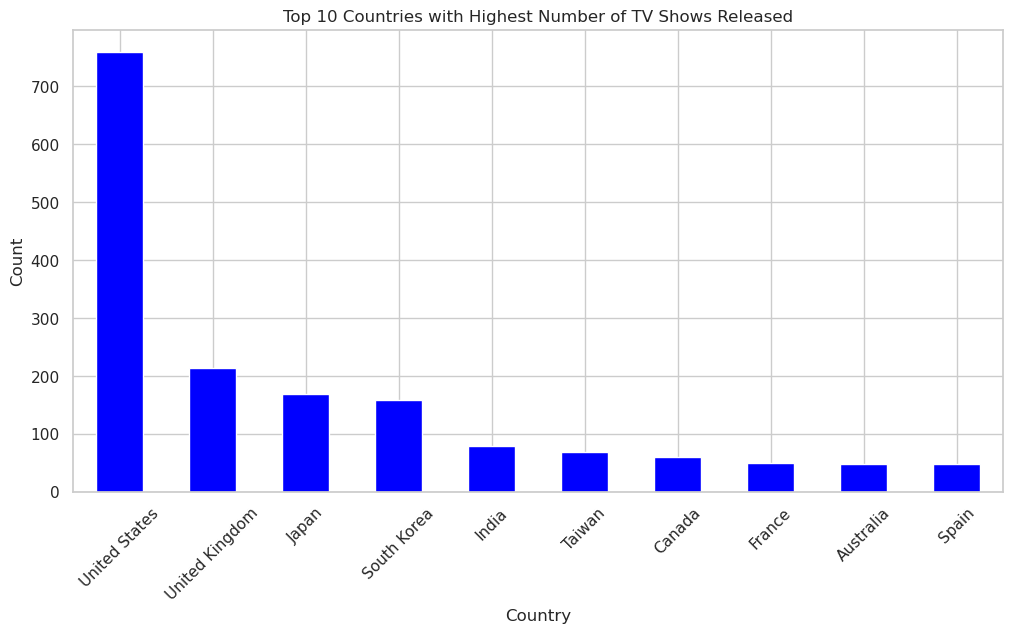

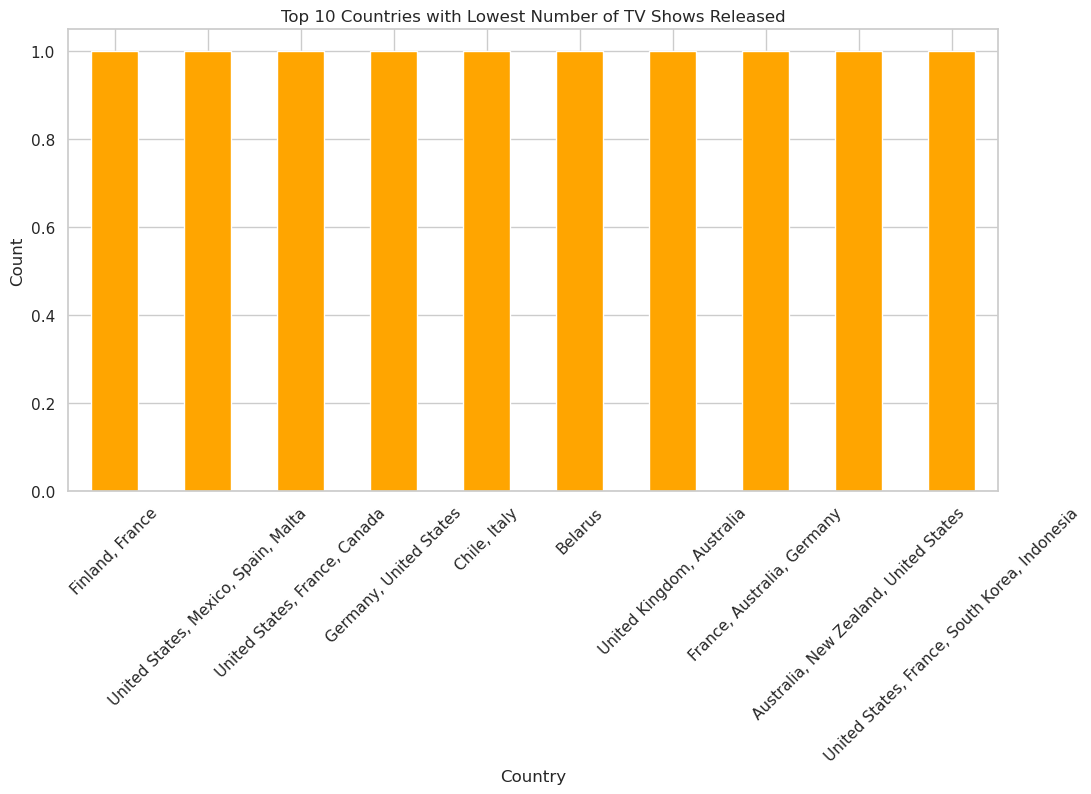

In [61]:
# Filter the data for TV shows
tv_shows_data = data[data['type'] == 'TV Show']

# Group the data by country and count the number of TV shows in each country
tv_shows_by_country = tv_shows_data['country'].value_counts()

# Get the top 10 countries with the highest number of TV shows released
top_10_countries_highest = tv_shows_by_country.head(10)

# Get the top 10 countries with the lowest number of TV shows released
top_10_countries_lowest = tv_shows_by_country.tail(10)

# Create a figure and axis for the bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for the top 10 countries with the highest number of TV shows released
top_10_countries_highest.plot(kind='bar', color='blue', ax=ax)
ax.set_title('Top 10 Countries with Highest Number of TV Shows Released')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot for the top 10 countries with the highest number of TV shows released
plt.show()

# Create a figure and axis for the bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for the top 10 countries with the lowest number of TV shows released
top_10_countries_lowest.plot(kind='bar', color='orange', ax=ax)
ax.set_title('Top 10 Countries with Lowest Number of TV Shows Released')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot for the top 10 countries with the lowest number of TV shows released
plt.show()

# OBSERVATION : 
**The United States has released the highest number of TV shows among the top 10 countries.**

# Analysis of Movies and TV Shows - Directors, Cast, and Duration

In [62]:
# Filter the data for movies
movies_data = data[data['type'] == 'Movie']

# Drop rows with missing values in the 'director', 'cast', and 'duration' columns
movies_data = movies_data.dropna(subset=['director', 'cast', 'duration'])

# Find the movie with the most directors
movies_data['directors_count'] = movies_data['director'].apply(lambda x: len(x.split(',')))
most_directors_movie = movies_data.sort_values('directors_count', ascending=False).iloc[0]

# Find the movie with the most cast members
movies_data['cast_count'] = movies_data['cast'].apply(lambda x: len(x.split(',')))
most_cast_movie = movies_data.sort_values('cast_count', ascending=False).iloc[0]

# Find the movie with the highest duration
movies_data['duration'] = movies_data['duration'].astype(str)  # Convert to string
movies_data['duration'] = movies_data['duration'].str.extract('(\d+)', expand=False).astype(float)
highest_duration_movie = movies_data.sort_values('duration', ascending=False).iloc[0]

# Filter the data for TV shows
tv_shows_data = data[data['type'] == 'TV Show']

# Drop rows with missing values in the 'director', 'cast', and 'duration' columns
tv_shows_data = tv_shows_data.dropna(subset=['director', 'cast', 'duration'])

# Find the TV show with the most directors
tv_shows_data['directors_count'] = tv_shows_data['director'].apply(lambda x: len(x.split(',')))
most_directors_tv_show = tv_shows_data.sort_values('directors_count', ascending=False).iloc[0]

# Find the TV show with the most cast members
tv_shows_data['cast_count'] = tv_shows_data['cast'].apply(lambda x: len(x.split(',')))
most_cast_tv_show = tv_shows_data.sort_values('cast_count', ascending=False).iloc[0]

# Find the TV show with the highest duration
tv_shows_data['duration'] = tv_shows_data['duration'].astype(str)  # Convert to string
tv_shows_data['duration'] = tv_shows_data['duration'].str.extract('(\d+)', expand=False).astype(float)
highest_duration_tv_show = tv_shows_data.sort_values('duration', ascending=False).iloc[0]

# Print the details of the movie with the most directors
print(Fore.BLUE + "Movie with the most directors:")
print(Fore.RED + "Title:", most_directors_movie['title'])
print(Fore.RED + "Number of Directors:", most_directors_movie['directors_count'])
print(Style.RESET_ALL)

# Print the details of the movie with the most cast members
print(Fore.BLUE + "Movie with the most cast members:")
print(Fore.RED + "Title:", most_cast_movie['title'])
print(Fore.RED + "Number of Cast Members:", most_cast_movie['cast_count'])
print(Style.RESET_ALL)

# Print the details of the movie with the highest duration
print(Fore.BLUE + "Movie with the highest duration:")
print(Fore.RED + "Title:", highest_duration_movie['title'])
print(Fore.RED + "Duration (minutes):", highest_duration_movie['duration'])
print(Style.RESET_ALL)

# Print the details of the TV show with the most directors
print(Fore.BLUE + "TV show with the most directors:")
print(Fore.RED + "Title:", most_directors_tv_show['title'])
print(Fore.RED + "Number of Directors:", most_directors_tv_show['directors_count'])
print(Style.RESET_ALL)

# Print the details of the TV show with the most cast members
print(Fore.BLUE + "TV show with the most cast members:")
print(Fore.RED + "Title:", most_cast_tv_show['title'])
print(Fore.RED + "Number of Cast Members:", most_cast_tv_show['cast_count'])
print(Style.RESET_ALL)

# Print the details of the TV show with the highest duration
print(Fore.BLUE + "TV show with the highest duration:")
print(Fore.RED + "Title:", highest_duration_tv_show['title'])
print(Fore.RED + "Duration (seasons):", highest_duration_tv_show['duration'])
print(Style.RESET_ALL)

Movie with the most directors:
Title: Walt Disney Animation Studios Short Films Collection
Number of Directors: 13

Movie with the most cast members:
Title: Arthur Christmas
Number of Cast Members: 44

Movie with the highest duration:
Title: The School of Mischief
Duration (minutes): 253.0

TV show with the most directors:
Title: Navarasa
Number of Directors: 9

TV show with the most cast members:
Title: Afronta! Facing It!
Number of Cast Members: 26

TV show with the highest duration:
Title: Supernatural
Duration (seasons): 15.0



# Analysis of Movies and TV Shows - Fewest Directors, Cast Members, and Duration

In [63]:
# Filter the data for movies
movies_data = data[data['type'] == 'Movie']

# Drop rows with missing values in the 'director', 'cast', and 'duration' columns
movies_data = movies_data.dropna(subset=['director', 'cast', 'duration'])

# Find the movie with the fewest directors
movies_data['directors_count'] = movies_data['director'].apply(lambda x: len(x.split(',')))
fewest_directors_movie = movies_data.sort_values('directors_count').iloc[0]

# Find the movie with the fewest cast members
movies_data['cast_count'] = movies_data['cast'].apply(lambda x: len(x.split(',')))
fewest_cast_movie = movies_data.sort_values('cast_count').iloc[0]

# Find the movie with the minimum duration
movies_data['duration'] = movies_data['duration'].astype(str)  # Convert to string
movies_data['duration'] = movies_data['duration'].str.extract('(\d+)', expand=False).astype(float)
minimum_duration_movie = movies_data.sort_values('duration').iloc[0]

# Filter the data for TV shows
tv_shows_data = data[data['type'] == 'TV Show']

# Drop rows with missing values in the 'director', 'cast', and 'duration' columns
tv_shows_data = tv_shows_data.dropna(subset=['director', 'cast', 'duration'])

# Find the TV show with the fewest directors
tv_shows_data['directors_count'] = tv_shows_data['director'].apply(lambda x: len(x.split(',')))
fewest_directors_tv_show = tv_shows_data.sort_values('directors_count').iloc[0]

# Find the TV show with the fewest cast members
tv_shows_data['cast_count'] = tv_shows_data['cast'].apply(lambda x: len(x.split(',')))
fewest_cast_tv_show = tv_shows_data.sort_values('cast_count').iloc[0]

# Find the TV show with the minimum duration
tv_shows_data['duration'] = tv_shows_data['duration'].astype(str)  # Convert to string
tv_shows_data['duration'] = tv_shows_data['duration'].str.extract('(\d+)', expand=False).astype(float)
minimum_duration_tv_show = tv_shows_data.sort_values('duration').iloc[0]

# Print the details of the movie with the fewest directors
print(Fore.BLUE + "Movie with the fewest directors:")
print(Fore.RED + "Title:", fewest_directors_movie['title'])
print(Fore.RED + "Number of Directors:", fewest_directors_movie['directors_count'])
print(Style.RESET_ALL)

# Print the details of the movie with the fewest cast members
print(Fore.BLUE + "Movie with the fewest cast members:")
print(Fore.RED + "Title:", fewest_cast_movie['title'])
print(Fore.RED + "Number of Cast Members:", fewest_cast_movie['cast_count'])
print(Style.RESET_ALL)

# Print the details of the movie with the minimum duration
print(Fore.BLUE + "Movie with the minimum duration:")
print(Fore.RED + "Title:", minimum_duration_movie['title'])
print(Fore.RED + "Duration (minutes):", minimum_duration_movie['duration'])
print(Style.RESET_ALL)

# Print the details of the TV show with the fewest directors
print(Fore.BLUE + "TV show with the fewest directors:")
print(Fore.RED + "Title:", fewest_directors_tv_show['title'])
print(Fore.RED + "Number of Directors:", fewest_directors_tv_show['directors_count'])
print(Style.RESET_ALL)

# Print the details of the TV show with the fewest cast members
print(Fore.BLUE + "TV show with the fewest cast members:")
print(Fore.RED + "Title:", fewest_cast_tv_show['title'])
print(Fore.RED + "Number of Cast Members:", fewest_cast_tv_show['cast_count'])
print(Style.RESET_ALL)

# Print the details of the TV show with the minimum duration
print(Fore.BLUE + "TV show with the minimum duration:")
print(Fore.RED + "Title:", minimum_duration_tv_show['title'])
print(Fore.RED + "Duration (seasons):", minimum_duration_tv_show['duration'])
print(Style.RESET_ALL)

Movie with the fewest directors:
Title: Invisible
Number of Directors: 1

Movie with the fewest cast members:
Title: Secrets of Selfridges
Number of Cast Members: 1

Movie with the minimum duration:
Title: Cops and Robbers
Duration (minutes): 8.0

TV show with the fewest directors:
Title: Ganglands
Number of Directors: 1

TV show with the fewest cast members:
Title: Myths & Monsters
Number of Cast Members: 1

TV show with the minimum duration:
Title: Ganglands
Duration (seasons): 1.0



# Analysis of Top 10 Directors

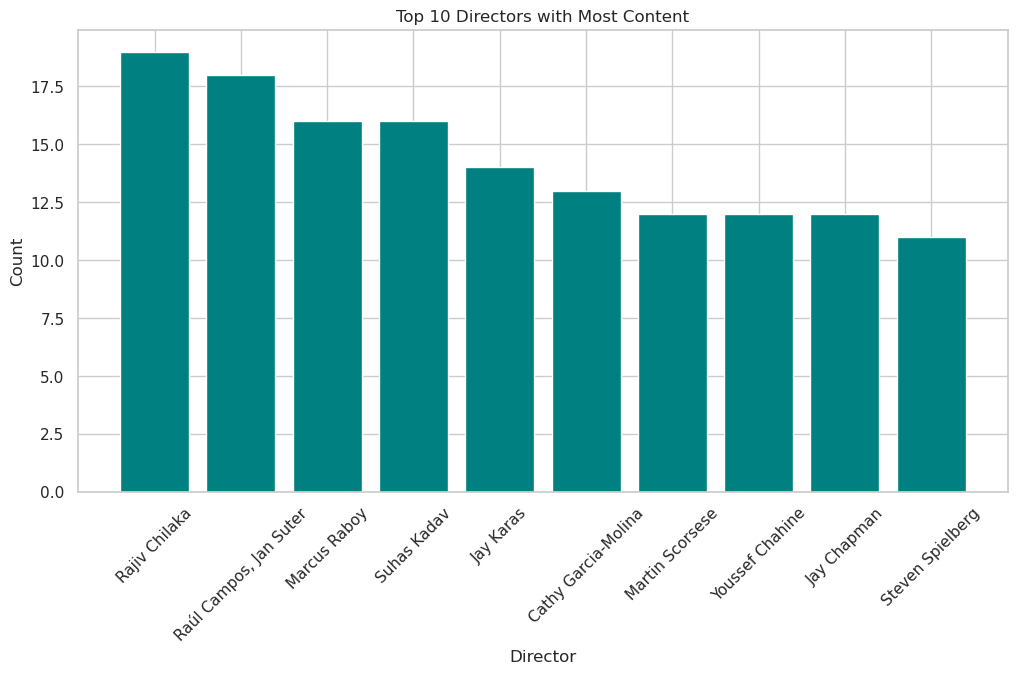

In [64]:
top_directors = data['director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_directors.index, top_directors.values, color='teal')
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 10 Directors with Most Content')
plt.xticks(rotation=45)
plt.show()


# OBSERVATION :
**Rajiv Chilaka has the highest number of content among the top 10 directors.**

# Analysis of Average Duration of Movies and TV Shows over Time

/tmp/ipykernel_33/1915573276.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['duration'] = movies_data['duration'].str.replace(' min', '').astype(float)


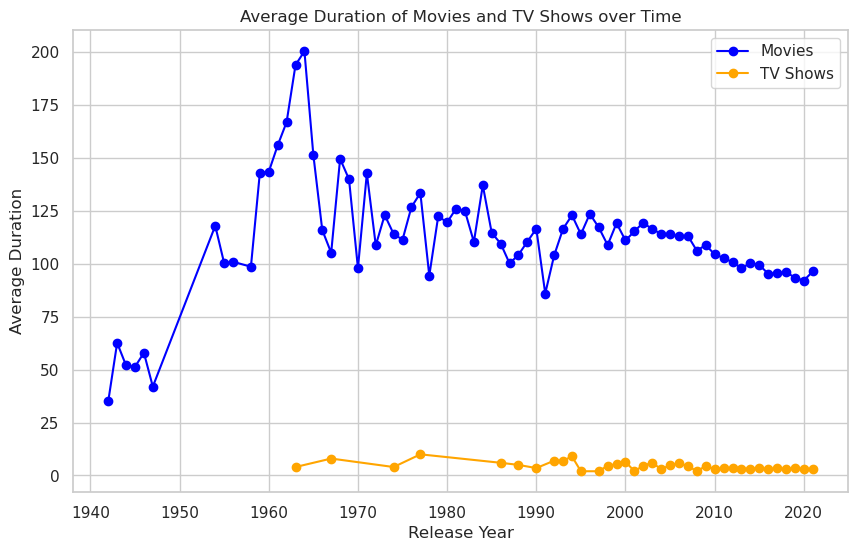

In [65]:
# Filter out rows with 'Movie' or 'TV Show' type
movies_data = data[data['type'] == 'Movie']
tv_shows_data = data[data['type'] == 'TV Show']

# Convert 'duration' column to numeric for movies
movies_data['duration'] = movies_data['duration'].str.replace(' min', '').astype(float)

# Remove rows with '1 Season' duration for TV shows
tv_shows_data = tv_shows_data[~tv_shows_data['duration'].str.contains('1 Season')]

# Convert 'duration' column to numeric for TV shows
tv_shows_data['duration'] = tv_shows_data['duration'].str.replace(' Seasons', '').astype(int)

# Group data by 'release_year' and calculate average duration
avg_movies_duration = movies_data.groupby('release_year')['duration'].mean().reset_index()
avg_tv_shows_duration = tv_shows_data.groupby('release_year')['duration'].mean().reset_index()

# Plot average duration over time for movies and TV shows
plt.figure(figsize=(10, 6))
plt.plot(avg_movies_duration['release_year'], avg_movies_duration['duration'], marker='o', linestyle='-', color='blue', label='Movies')
plt.plot(avg_tv_shows_duration['release_year'], avg_tv_shows_duration['duration'], marker='o', linestyle='-', color='orange', label='TV Shows')

plt.xlabel('Release Year')
plt.ylabel('Average Duration')
plt.title('Average Duration of Movies and TV Shows over Time')
plt.legend()
plt.grid(True)
plt.show()

# Analysis of the Distribution of Combined TV Shows and Movies by Release Year

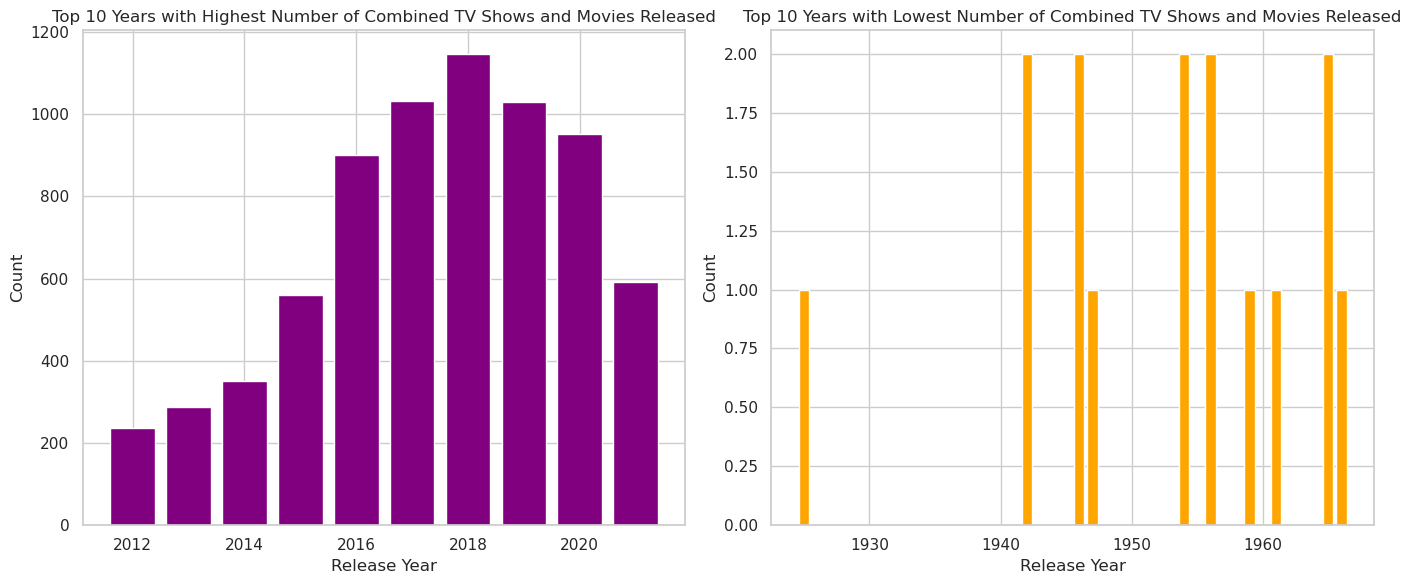

In [66]:
combined_counts = data['release_year'].value_counts()

top_10_years_highest = combined_counts.head(10)
top_10_years_lowest = combined_counts.tail(10)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(top_10_years_highest.index, top_10_years_highest.values, color='purple')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Top 10 Years with Highest Number of Combined TV Shows and Movies Released')

plt.subplot(1, 2, 2)
plt.bar(top_10_years_lowest.index, top_10_years_lowest.values, color='orange')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Top 10 Years with Lowest Number of Combined TV Shows and Movies Released')

plt.tight_layout()
plt.show()

# OBSERVATION : 
**2018 had the highest number of combined TV shows and movies released.**

# Analysis of Top 10 Movies with Highest and Lowest Ratings

In [67]:
# Filter the data for movies
movies_data = data[data['type'] == 'Movie']

# Drop rows with missing values in the 'rating' and 'country' columns
movies_data = movies_data.dropna(subset=['rating', 'country'])

# Sort movies_data by rating in descending order
sorted_movies = movies_data.sort_values('rating', ascending=False)

# Get the top 10 movies with the highest rating
top_10_highest_rated_movies = sorted_movies.head(10)

# Get the top 10 movies with the lowest rating
top_10_lowest_rated_movies = sorted_movies.tail(10)

# Print the details of the top 10 highest rated movies
print(Fore.BLUE + "Top 10 Movies with the Highest Rating:")
for index, movie in top_10_highest_rated_movies.iterrows():
    print(Fore.RED + "\nTitle:", movie['title'])
    print(Fore.RED + "Rating:", movie['rating'])
    print(Fore.RED + "Country:", movie['country'])
    print("------------------------")
print(Style.RESET_ALL)

# Print the details of the top 10 lowest rated movies
print(Fore.BLUE + "Top 10 Movies with the Lowest Rating:")
for index, movie in top_10_lowest_rated_movies.iterrows():
    print(Fore.RED + "\nTitle:", movie['title'])
    print(Fore.RED + "Rating:", movie['rating'])
    print(Fore.RED + "Country:", movie['country'])
    print("------------------------")
print(Style.RESET_ALL)

Top 10 Movies with the Highest Rating:

Title: Immoral Tales
Rating: UR
Country: France
------------------------

Title: Sex Doll
Rating: UR
Country: United Kingdom, France
------------------------

Title: You Don't Mess with the Zohan
Rating: UR
Country: United States
------------------------

Title: LEGO Ninjago: Masters of Spinjitzu: Day of the Departed
Rating: TV-Y7-FV
Country: Denmark, China
------------------------

Title: Dear Dracula
Rating: TV-Y7-FV
Country: United States
------------------------

Title: Motu Patlu: King of Kings
Rating: TV-Y7-FV
Country: India
------------------------

Title: Leo the Lion
Rating: TV-Y7-FV
Country: United States, Italy
------------------------

Title: Chhota Bheem and the Curse of Damyaan
Rating: TV-Y7
Country: India
------------------------

Title: Power Rangers Samurai: Party Monsters (Halloween Special)
Rating: TV-Y7
Country: United States
------------------------

Title: Monster High: Why Do Ghouls Fall in Love?
Rating: TV-Y7
Country: Unit

# Distribution of Ratings by Release Year

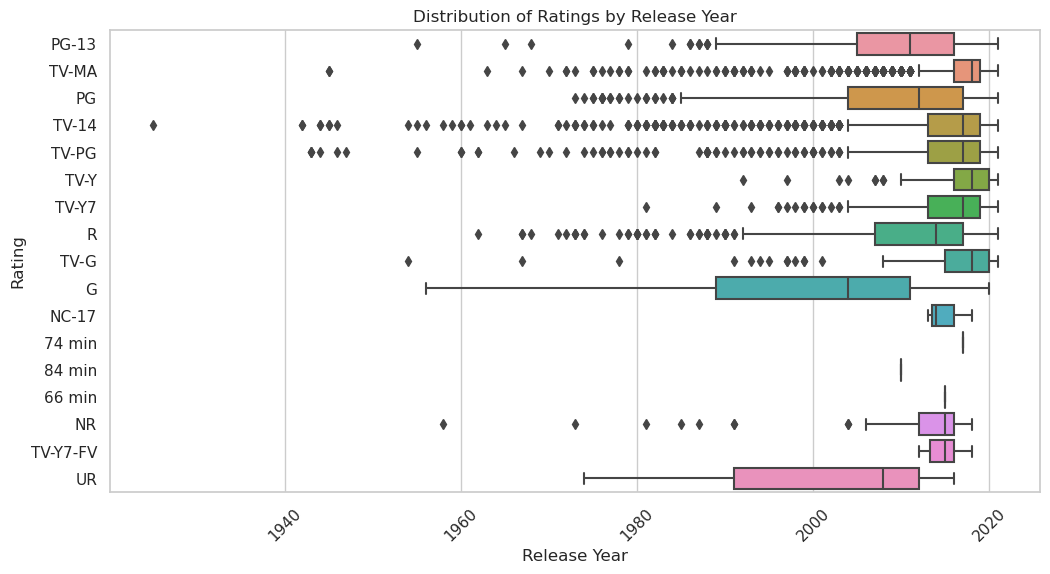

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='release_year', y='rating', data=data)
plt.title('Distribution of Ratings by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


# Analysis of Top 10 Genres with Most Titles

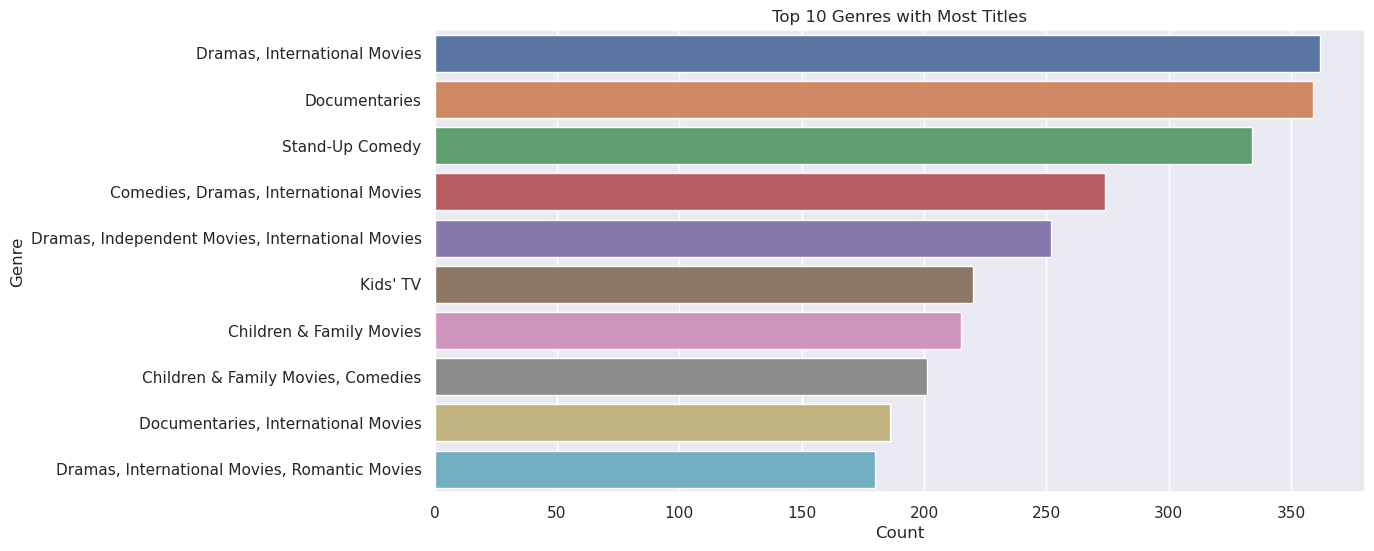

In [69]:
# Set the style
sns.set_style('darkgrid')

# Plot the count of genres on a separate graph
plt.figure(figsize=(12, 6))
sns.countplot(y='listed_in', data=data, order=data['listed_in'].value_counts().index[:10])
plt.title('Top 10 Genres with Most Titles')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# OBSERVATION
**Among the top 10 genres, dramas and international movies have the highest number of titles.**

# Top 10 Directors and Cast with Most Titles

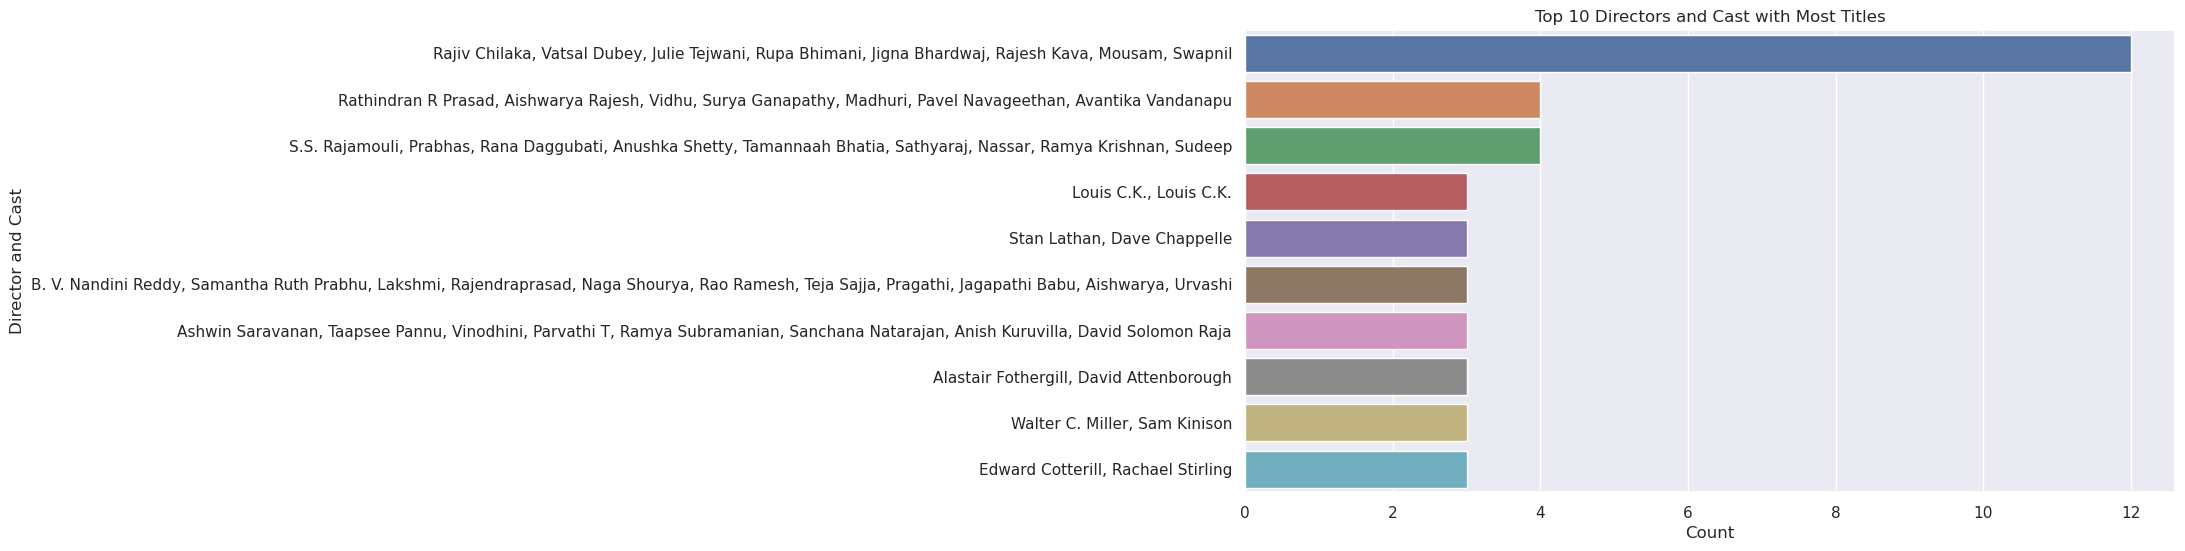

In [70]:
# Create a copy of the original dataset
data_copy = data.copy()

# Create a new column 'director_cast' by combining 'director' and 'cast' columns
data_copy['director_cast'] = data_copy['director'] + ', ' + data_copy['cast']

# Plot the graph
plt.figure(figsize=(12, 6))
sns.countplot(y='director_cast', data=data_copy[data_copy['director_cast'].notnull()], order=data_copy['director_cast'].value_counts().index[:10])
plt.title('Top 10 Directors and Cast with Most Titles')
plt.xlabel('Count')
plt.ylabel('Director and Cast')
plt.show()

# Top 10 Actors/Actresses with Most and Least Appearances

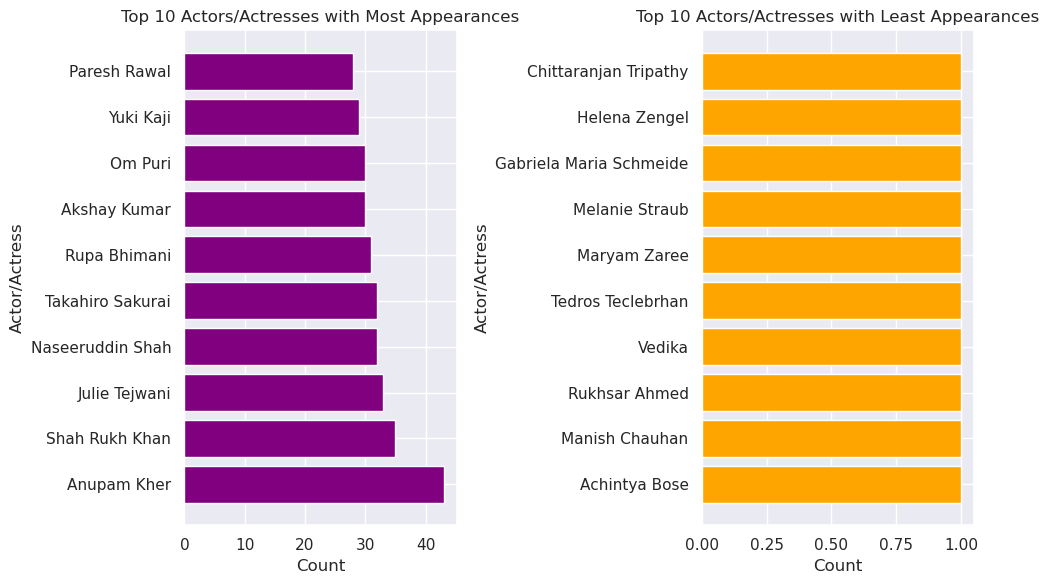

In [71]:
# Set the plotting style using seaborn
sns.set(style='darkgrid')

# Top 10 actors/actresses with most appearances
top_actors = data['cast'].str.split(', ', expand=True).stack().value_counts().head(10)

# Top 10 actors/actresses with least appearances
bottom_actors = data['cast'].str.split(', ', expand=True).stack().value_counts().tail(10)

plt.figure(figsize=(10, 6))

# Plotting top actors/actresses
plt.subplot(1, 2, 1)
plt.barh(top_actors.index, top_actors.values, color='purple')
plt.xlabel('Count')
plt.ylabel('Actor/Actress')
plt.title('Top 10 Actors/Actresses with Most Appearances')

# Plotting bottom actors/actresses
plt.subplot(1, 2, 2)
plt.barh(bottom_actors.index, bottom_actors.values, color='orange')
plt.xlabel('Count')
plt.ylabel('Actor/Actress')
plt.title('Top 10 Actors/Actresses with Least Appearances')

plt.tight_layout()
plt.show()

# OBSERVATION
**Anupam Kher has the highest number of appearances among the top 10 actors/actresses.**

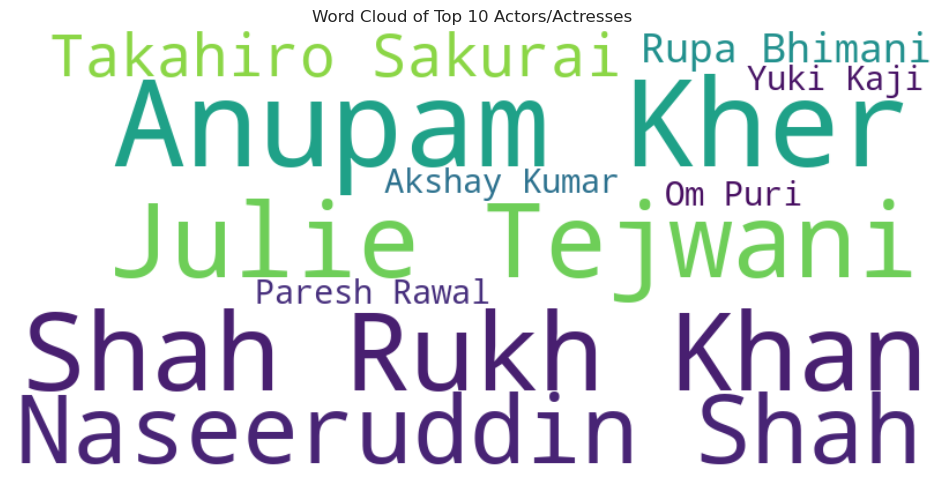

In [72]:
top_actors = data['cast'].str.split(', ', expand=True).stack().value_counts().head(10)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_actors)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 10 Actors/Actresses')
plt.show()

**Thanks for checking out my project!**

**I'm Muhammad Rayyan, and I appreciate your views.**

**Your feedback matters, so please leave a like 👍 and share your thoughts in the comments.**

**Stay tuned for future updates as I continue to enhance this project🚀😊**

**Thank you! ❤️**

![the end](https://www.freepnglogos.com/uploads/the-end-png/the-end-the-black-dahlia-the-sowden-house-foundation-0.png)